In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
import json
from numpy import linalg as LA
import tensorflow as tf
import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

net = 'binary_inputs'
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net) 
sys.path.insert(0, PATH_YANGNET)
from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model, get_perf, FixedPoint_Model
import tools

In [3]:
data_folder = 'code/multitask-nets/'+net+'/data/'
rnn_type = 'LeakyRNN'
activation = 'softplus'
init = 'randgauss'
seed = '0'
n_rnn = str(256)
l2w = -6
l2h = -6
l1w = 0
l1h = 0
lr = -7
rule_trains = ['fdgo','delaygo','fdanti','delayanti']

In [4]:
hparams

NameError: name 'hparams' is not defined

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(263, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/code/multitask-nets/binary_inputs/data/LeakyRNN/softplus/randgauss/4_tasks/256_n_rnn/l2_w6_h6_fdgo_fdanti_delaygo_delayanti/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/code/multitask-nets/binary_inputs/data/LeakyRNN/softplus/randgauss/4_tasks/256_n_rnn/l2_w6_h6_fdgo_fdanti_delaygo_delayanti/1/model.ckpt


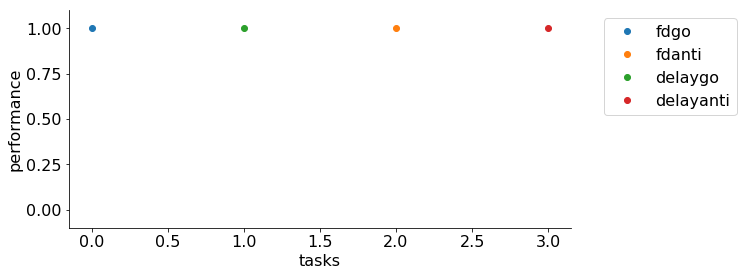

In [5]:
seed = str(1)
s = '_'
rule_trains_str = s.join(rule_trains)
net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)+'_'+rule_trains_str
net_name = 'l2_w6_h6_fdgo_fdanti_delaygo_delayanti'

m = os.path.join(p,data_folder,rnn_type,activation,init,
                          str(len(rule_trains))+'_tasks',str(n_rnn)+'_n_rnn',net_name,seed)

fig = plt.figure(figsize=(9, 4))
plt.rcParams.update({'font.size': 16})
ax = plt.subplot(111)

model = Model(m)
with tf.Session() as sess:
    model.restore()
    var_list = model.var_list
    params = [sess.run(var) for var in var_list]
    hparams = model.hp
    for rule in hparams['rule_trains']:
        trial = generate_trials(rule, hparams, mode='random', noise_on=False, batch_size = 128*16)
        feed_dict = tools.gen_feed_dict(model, trial, hparams)
        h_tf, y_hat_tf = sess.run([model.h, model.y_hat], feed_dict=feed_dict) #(n_time, n_condition, n_neuron)
        perf = get_perf(y_hat_tf,trial.y_loc)
        plt.plot(np.where(trial.x[0,0,hparams['rule_start']:]), np.mean(perf),'o',label = rule)
#             plt.text(np.where(trial.x[0,0,5:]), np.mean(perf),rule,rotation = 45)

plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylim((-0.1,1.1))
plt.xlabel('tasks')
plt.ylabel('performance')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

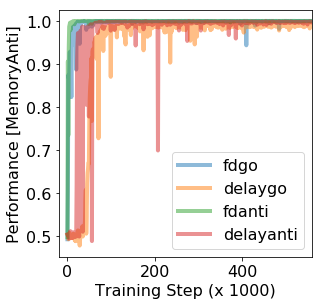

In [14]:
fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 16})
ax_perf = plt.subplot(2,2,1)

fname = os.path.join(m, 'log.json')
with open(fname, 'r') as f:
    log_post = json.load(f)
for r in range(len(rule_trains)):

    plt.sca(ax_perf)
    x = log_post['perf_'+rule_trains[r]]
    plt.plot(x,'-',alpha = .5,linewidth = 4,label = rule_trains[r])
    ax_perf.set_xlabel('Training Step (x 1000)')
    ax_perf.set_ylabel('Performance [MemoryAnti]')
    
plt.xlim([-20,560])
plt.legend()        

In [15]:
m = os.path.join(p,data_folder,rnn_type,activation,init,
                          str(len(rule_trains))+'_tasks',str(n_rnn)+'_n_rnn',net_name,'0')

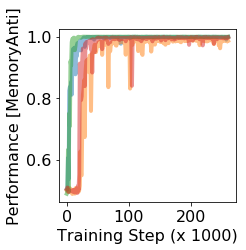

In [16]:
fig = plt.figure(figsize=(7, 7))
plt.rcParams.update({'font.size': 16})
ax_perf = plt.subplot(2,2,1)

fname = os.path.join(m, 'log.json')
with open(fname, 'r') as f:
    log_post = json.load(f)
for r in range(len(rule_trains)):

    plt.sca(ax_perf)
    x = log_post['perf_'+rule_trains[r]]
    plt.plot(x,'-',alpha = .5,linewidth = 4,label = rule)
    ax_perf.set_xlabel('Training Step (x 1000)')
    ax_perf.set_ylabel('Performance [MemoryAnti]')
        